# Microbench Results

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from palettable.cubehelix import Cubehelix
import seaborn as sns
import math

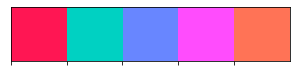

In [11]:
colors = sns.cubehelix_palette(n_colors=10, start=5, rot=4, hue=3, light=0.4, dark=.8)
colors = np.array(colors)[[0,3,4,5,6]]
sns.palplot(colors)


In [12]:
OUTPUT_DIR="micro_bw/"
SYS_NAME="Bento"

In [13]:
def save_fig(file_name, figure, output_dir):
    figure.patch.set_facecolor("white")
    figure.savefig(output_dir + file_name, bbox_inches="tight")

In [14]:
def create_bw_microbench_graph(input_dataframe, configs, markers, colors, packet_size_ticks):
    fig, ax = plt.subplots()

    subsets = []
    legend_labels = []

    for config in configs:
        subset = input_dataframe.loc[input_dataframe.config.eq(config)]
        subsets.append(subset)
        legend_labels.append(config)

    for i in range(0, len(subsets)):
        subsets[i].plot(x="payload_size", y="avg_bw_gbps", logx=True, ax=ax, marker=markers[i], color=[colors[i]], label=configs[i])
    x_ticks = packet_size_ticks
    x_labels = packet_size_ticks

    ax.set_xlabel("Packet size (bytes, log scale)", fontsize=16)
    ax.set_ylabel("Goodput (Gbps)", fontsize=16)
    ax.set_ylim([0, 130])
    plt.xticks(x_ticks, x_labels, fontsize=14)
    plt.yticks(fontsize=14)
    plt.draw()

    return fig, ax


# New Data

In [21]:
udp_echo_data = pd.read_csv("micro_bw/udp_echo_collected_results.csv")
udp_echo_data["avg_bw_gbps"] = udp_echo_data["avg_bw"]/(10**9)
udp_echo_data

,config,payload_size,num_clients,threads_per,avg_bw,avg_bw_gbps
0,cpu_1thread,64,2,1,2.651134e+08,0.265113
1,cpu_1thread,64,2,8,8.151042e+07,0.081510
2,cpu_1thread,64,2,32,8.372348e+07,0.083723
3,cpu_1thread,64,2,64,8.428943e+07,0.084289
4,cpu_1thread,128,2,1,4.591870e+08,0.459187
...,...,...,...,...,...,...
75,fpga_1instance,6144,2,64,9.893719e+10,98.937186
76,fpga_1instance,8192,2,1,3.737743e+10,37.377434
77,fpga_1instance,8192,2,8,9.920076e+10,99.200760
78,fpga_1instance,8192,2,32,9.920076e+10,99.200762


In [22]:
cpu = pd.read_csv("cpu_udp_echo_results.csv")
cpu["avg_bw_gbps"] = cpu["avg_bw"]/(10**9)
cpu

,config,payload_size,num_clients,threads_per,avg_bw,avg_bw_gbps
0,cpu_1thread,64,1,1,2.988588e+08,0.298859
1,cpu_1thread,64,1,32,8.351479e+07,0.083515
2,cpu_1thread,64,1,64,8.229902e+07,0.082299
3,cpu_1thread,64,2,1,2.324158e+08,0.232416
4,cpu_1thread,64,2,32,8.571387e+07,0.085714
...,...,...,...,...,...,...
85,cpu_1thread,8192,2,32,2.633784e+09,2.633784
86,cpu_1thread,8192,2,64,2.638974e+09,2.638974
87,cpu_1thread,8192,3,1,2.333822e+09,2.333822
88,cpu_1thread,8192,3,32,2.703420e+09,2.703420


In [23]:
fpga = udp_echo_data.loc[udp_echo_data["config"] == "fpga_1instance"]


In [24]:
full_df = pd.concat([cpu, fpga])

In [25]:
def create_max_dataframe(input_dataframe):
    configs = input_dataframe["config"].unique()
    payload_sizes = input_dataframe["payload_size"].unique()
    
    entries = []
    
    for config in configs:
        for payload_size in payload_sizes:
            entries_sel = input_dataframe.loc[(input_dataframe["config"]==config) & (input_dataframe["payload_size"]==payload_size)]
            entries_sel.reset_index(inplace=True)
            max_index = entries_sel["avg_bw_gbps"].idxmax()
            entry = entries_sel.iloc[max_index]
            entries.append(entry)
            
    return pd.DataFrame(entries).drop(["index"], axis=1).reset_index().drop(["index"], axis=1)
        

In [26]:
maxes_dataframe = create_max_dataframe(full_df)
maxes_dataframe

,config,payload_size,num_clients,threads_per,avg_bw,avg_bw_gbps
0,cpu_1thread,64,1,1,2.988588e+08,0.298859
1,cpu_1thread,128,1,1,6.191547e+08,0.619155
2,cpu_1thread,256,1,1,1.085745e+09,1.085745
3,cpu_1thread,512,1,1,1.790090e+09,1.790090
4,cpu_1thread,1024,1,1,3.649175e+09,3.649175
5,cpu_1thread,2048,1,1,6.739664e+09,6.739664
6,cpu_1thread,3072,1,1,1.006655e+10,10.066553
7,cpu_1thread,4096,1,1,1.157582e+10,11.575815
8,cpu_1thread,6144,1,1,1.389445e+10,13.894452
9,cpu_1thread,8192,1,1,1.287148e+10,12.871482


In [27]:
maxes_dataframe["kreqs_per_sec"] = ((maxes_dataframe["avg_bw"]/8)/(maxes_dataframe["payload_size"]))/1000
maxes_dataframe

,config,payload_size,num_clients,threads_per,avg_bw,avg_bw_gbps,kreqs_per_sec
0,cpu_1thread,64,1,1,2.988588e+08,0.298859,583.708515
1,cpu_1thread,128,1,1,6.191547e+08,0.619155,604.643253
2,cpu_1thread,256,1,1,1.085745e+09,1.085745,530.149085
3,cpu_1thread,512,1,1,1.790090e+09,1.790090,437.033733
4,cpu_1thread,1024,1,1,3.649175e+09,3.649175,445.455888
5,cpu_1thread,2048,1,1,6.739664e+09,6.739664,411.356462
6,cpu_1thread,3072,1,1,1.006655e+10,10.066553,409.609094
7,cpu_1thread,4096,1,1,1.157582e+10,11.575815,353.265853
8,cpu_1thread,6144,1,1,1.389445e+10,13.894452,282.683354
9,cpu_1thread,8192,1,1,1.287148e+10,12.871482,196.403227


In [28]:
maxes_pivot = maxes_dataframe.pivot(index="payload_size", values="avg_bw_gbps", columns="config")
maxes_pivot

config,cpu_1thread,fpga_1instance
payload_size,,
64,0.298859,9.416973
128,0.619155,16.927184
256,1.085745,33.653643
512,1.790090,67.547807
1024,3.649175,93.944943
2048,6.739664,96.877945
3072,10.066553,97.896739
4096,11.575815,98.414213
6144,13.894452,98.937186


In [29]:
speedup = maxes_pivot["fpga_1instance"]/maxes_pivot["cpu_1thread"]
speedup

payload_size
64      31.509777
128     27.339185
256     30.995890
512     37.734304
1024    25.744162
2048    14.374298
3072     9.724951
4096     8.501709
6144     7.120625
8192     7.707020
dtype: float64

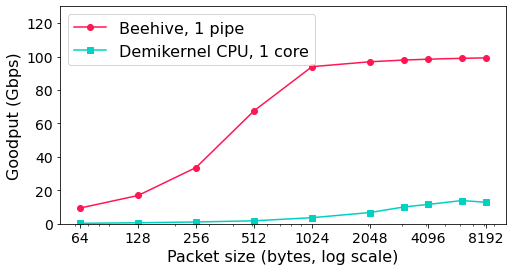

In [30]:
fig, ax = create_bw_microbench_graph(maxes_dataframe, ["fpga_1instance", "cpu_1thread"], ["o", "s", "*", "v"], colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])
ax.legend(["Beehive, 1 pipe", "Demikernel CPU, 1 core"], fontsize=16)
fig.set_size_inches(8, 4)
save_fig("cpu_v_fpga_udp_echo.pdf", fig, OUTPUT_DIR)


# PANIC data

In [31]:
panic_data = pd.read_csv("micro_bw/panic_micro_bw_avgs.csv")
panic_data.rename(columns = {"bw_gbps": "avg_bw_gbps", "packet_size": "payload_size"}, inplace=True)

In [32]:
new_sim_data = pd.read_csv("micro_bw/new_sim_bws.csv")
new_sim_data.rename(columns = {"bw_gbps": "avg_bw_gbps", "packet_size": "payload_size"}, inplace=True)

In [33]:
full_sim_df = pd.concat([panic_data, new_sim_data])
full_sim_df

,config,payload_size,avg_bw_gbps
0,panic_sim,64,18.281250
1,panic_sim,128,32.000000
2,panic_sim,256,51.191964
3,panic_sim,512,73.125000
4,panic_sim,1024,93.062500
5,panic_sim,2048,107.770830
6,panic_sim,4096,116.968750
7,panic_sim,8192,122.218750
0,beehive_sim,64,21.335771
1,beehive_sim,128,36.571400


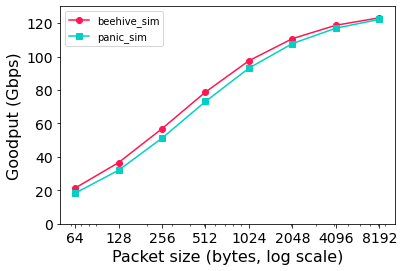

In [34]:
fig, ax = create_bw_microbench_graph(full_sim_df, ["beehive_sim", "panic_sim"], ["o", "s", "*", "v"], colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])

In [35]:
full_result_df = pd.concat([full_sim_df, maxes_dataframe])

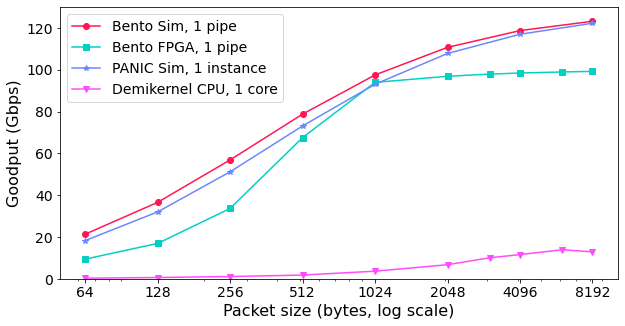

In [36]:
fig, ax = create_bw_microbench_graph(full_result_df, ["beehive_sim", "fpga_1instance", "panic_sim", "cpu_1thread"], ["o", "s", "*", "v"], colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])
ax.legend([f"{SYS_NAME} Sim, 1 pipe", f"{SYS_NAME} FPGA, 1 pipe", "PANIC Sim, 1 instance", "Demikernel CPU, 1 core"], fontsize=14, loc="upper left")
fig.set_size_inches(10, 5)
save_fig("cpu_v_fpga_udp_echo.pdf", fig, OUTPUT_DIR)

# Demikernel 1.4 Benchmarks

In [19]:
demi_data = pd.read_csv("micro_bw/demi_perf_udp_echo.csv")
demi_data["avg_bw_gbps"] = (demi_data["avg_bw"])/(10**9)

In [20]:
demi_maxes = create_max_dataframe(demi_data)
demi_maxes

,config,payload_size,num_clients,threads_per,avg_bw,avg_bw_gbps
0,cpu_1thread_catnip,64,1,1,1.588185e+08,0.158818
1,cpu_1thread_catnip,128,1,1,3.154342e+08,0.315434
2,cpu_1thread_catnip,256,1,1,5.881183e+08,0.588118
3,cpu_1thread_catnip,512,1,1,1.087695e+09,1.087695
4,cpu_1thread_catnip,1024,1,1,2.081482e+09,2.081482
5,cpu_1thread_catnip,2048,1,1,3.420511e+09,3.420511
6,cpu_1thread_catnip,3072,1,1,4.136689e+09,4.136689
7,cpu_1thread_catnip,4096,1,1,4.982510e+09,4.982510
8,cpu_1thread_catnip,6144,1,1,4.134710e+09,4.134710
9,cpu_1thread_catnip,8192,1,1,6.428903e+09,6.428903


Text(0.5, 1.0, 'UDP')

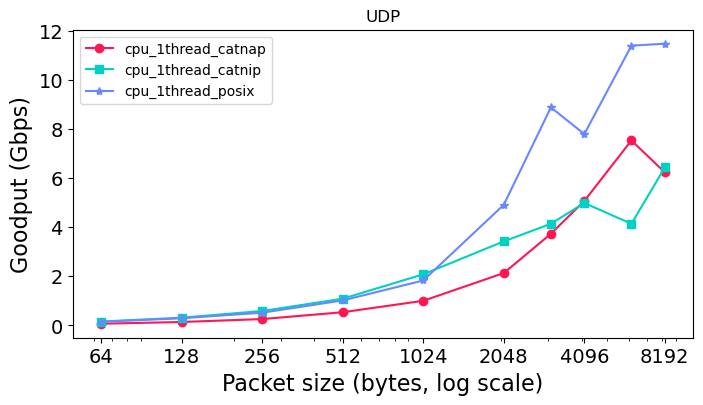

In [31]:
fig, ax = create_bw_microbench_graph(demi_maxes, ["cpu_1thread_catnap", "cpu_1thread_catnip", "cpu_1thread_posix"], ["o", "s", "*", "v"], colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])
fig.set_size_inches(8, 4)
save_fig("udp_echo_demi1.4_perf.png", fig, OUTPUT_DIR)
ax.set_title("UDP")

# Old Data

In [3]:
def process_raw_logs(input_dataframe, platform):
    tmp = input_dataframe.assign(bw_gbps=lambda row: row["bw_bps"]/(10**9))
    tmp = tmp.assign(platform=lambda row: platform)
    return tmp

In [5]:
sim_data = pd.read_csv("sim_measured_bws.csv")
sim_data_processed = process_raw_logs(sim_data, "sim")


In [6]:
fpga_data = pd.read_csv("fpga_avg_bws.csv")
fpga_data_processed = process_raw_logs(fpga_data, "fpga")
fpga_data_processed

,packet_size,bw_bps,bw_gbps,platform
0,64,7.110788e+09,7.110788,fpga
1,128,1.347284e+10,13.472840,fpga
2,256,2.438021e+10,24.380208,fpga
3,512,4.095883e+10,40.958830,fpga
4,1024,6.205968e+10,62.059685,fpga
5,2048,8.359184e+10,83.591837,fpga
6,3072,9.452308e+10,94.523077,fpga
7,4096,9.864428e+10,98.644284,fpga
8,6144,9.916848e+10,99.168476,fpga
9,8192,9.943236e+10,99.432356,fpga


In [7]:
no_noc_sim_data = pd.read_csv("no_noc_sim_bws.csv")
no_noc_sim_data_processed = process_raw_logs(no_noc_sim_data, "sim_no_noc")
no_noc_sim_data_processed

,packet_size,bw_bps,bw_gbps,platform
0,64,7.521103e+09,7.521103,sim_no_noc
1,128,1.423007e+10,14.230069,sim_no_noc
2,256,2.556469e+10,25.564690,sim_no_noc
3,512,4.265490e+10,42.654897,sim_no_noc
4,1024,6.391172e+10,63.911724,sim_no_noc
5,2048,8.530979e+10,85.309793,sim_no_noc
6,3072,9.607945e+10,96.079448,sim_no_noc
7,4096,1.022941e+11,102.294069,sim_no_noc
8,6144,1.096739e+11,109.673931,sim_no_noc
9,8192,1.138005e+11,113.800533,sim_no_noc


In [8]:
no_noc_fpga_data = pd.read_csv("no_noc_avg_bws.csv")
no_noc_fpga_data_processed = process_raw_logs(no_noc_fpga_data, "fpga_no_noc")
no_noc_fpga_data_processed

,packet_size,bw_bps,bw_gbps,platform
0,64,6.736614e+09,6.736614,fpga_no_noc
1,128,1.279960e+10,12.799598,fpga_no_noc
2,256,2.327164e+10,23.271639,fpga_no_noc
3,512,3.938324e+10,39.383240,fpga_no_noc
4,1024,6.023445e+10,60.234451,fpga_no_noc
5,2048,8.192000e+10,81.920000,fpga_no_noc
6,3072,9.309091e+10,93.090909,fpga_no_noc
7,4096,9.864416e+10,98.644161,fpga_no_noc
8,6144,9.916850e+10,99.168503,fpga_no_noc
9,8192,9.943259e+10,99.432587,fpga_no_noc


In [ ]:
full_data = pd.concat([fpga_data_processed, sim_data_processed, no_noc_sim_data_processed, no_noc_fpga_data_processed])

NameError: name 'no_noc_sim_data_processed' is not defined

In [ ]:
def create_bw_microbench_graph(input_dataframe, platforms, markers, colors, packet_size_ticks):
    fig, ax = plt.subplots()

    subsets = []
    legend_labels = []

    for platform in platforms:
        subset = input_dataframe.loc[input_dataframe.platform.eq(platform)]
        subsets.append(subset)
        legend_labels.append(platform)

    for i in range(0, len(subsets)):
        subsets[i].plot(x="packet_size", y="bw_gbps", logx=True, ax=ax, marker=markers[i], color=[colors[i]], label=platforms[i])
    x_ticks = packet_size_ticks
    x_labels = packet_size_ticks

    ax.set_xlabel("Packet size (bytes, log scale)", fontsize=16)
    ax.set_ylabel("Goodput (Gbps)", fontsize=16)
    plt.xticks(x_ticks, x_labels, fontsize=14)
    plt.yticks(fontsize=14)
    plt.draw()

    return fig, ax


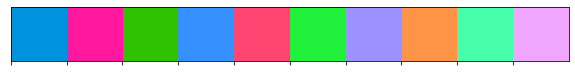

In [11]:
colors = sns.cubehelix_palette(n_colors=10, start=5, rot=8, hue=3, light=0.4, dark=.8)
sns.palplot(colors)

In [12]:
line_colors = [colors[2], colors[3], colors[6], colors[4]]

In [13]:
hex_colors = colors.as_hex()
fig_colors = [hex_colors[-1], hex_colors[5]]
fig_colors

['#f0a5ff', '#22f13b']

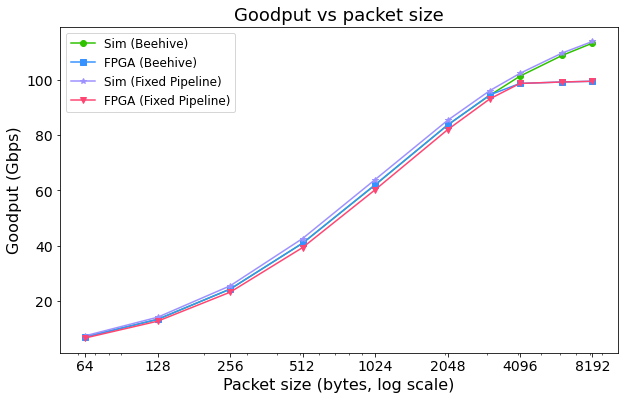

In [16]:
fig,ax = create_bw_microbench_graph(full_data, ["sim", "fpga", "sim_no_noc", "fpga_no_noc"], ["o", "s", "*", "v"], line_colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])
ax.set_title("Goodput vs packet size", fontsize=18)
fig.set_size_inches(10, 6)
ax.legend(["Sim (Beehive)", "FPGA (Beehive)", "Sim (Fixed Pipeline)", "FPGA (Fixed Pipeline)"], fontsize=12) 
save_fig("bw_micro_vs_packet_size.png", fig, OUTPUT_DIR)

In [18]:
def percent_diff_graph(input_dataframe, platform_1, platform_2, envs, colors, markers, packet_size_ticks):
    fig, ax = plt.subplots()
    diff_dfs = []
    for env in envs:
        env_df = input_dataframe.loc[input_dataframe.env.eq(env)]
        plat_1 = env_df.loc[env_df.platform.eq(platform_1)]
        plat_1_bw = plat_1["bw_gbps"]
        plat_2_bw = env_df.loc[env_df.platform.eq(platform_2)]["bw_gbps"]
        diff_series = ((plat_1_bw - plat_2_bw)/plat_2_bw) * 100
        diff_df = pd.DataFrame()
        diff_df["percent_diff"] = diff_series
        diff_df["packet_size"] = plat_1["packet_size"]
        diff_dfs.append(diff_df)

    for i in range(0, len(diff_dfs)):
        diff_dfs[i].plot(x="packet_size", y="percent_diff", logx=True, ax=ax, color=colors[i], marker=markers[i])

    x_ticks = packet_size_ticks
    x_labels = packet_size_ticks

    
    ax.set_xlabel("Packet size (bytes, log scale)", fontsize=16)
    ax.set_ylabel("Percent diff", fontsize=16)
    ax.legend(envs)
    plt.xticks(x_ticks, x_labels, fontsize=14)
    plt.yticks(fontsize=14)
    plt.draw()

    return fig, ax

In [19]:
pdiff_data = full_data.copy()
pdiff_data.loc[pdiff_data["platform"].str.contains("sim"),"env"] = "sim"
pdiff_data.loc[pdiff_data["platform"].str.contains("fpga"),"env"] = "fpga"
pdiff_data.loc[pdiff_data["platform"].str.contains("no_noc"), "platform"] = "no_noc"
pdiff_data.loc[~pdiff_data["platform"].str.contains("no_noc"), "platform"] = "noc"

In [20]:
"sim" in full_data.iloc[0]["platform"] 

False

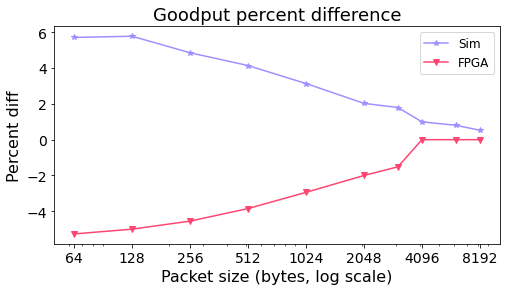

In [21]:
fig,ax = percent_diff_graph(pdiff_data, "no_noc", "noc", ["sim", "fpga"], line_colors[2:], ["*", "v"], [64, 128, 256, 512, 1024, 2048, 4096, 8192])
ax.set_title("Goodput percent difference", fontsize=18)
ax.legend(["Sim", "FPGA"], fontsize=12) 
fig.set_size_inches(8 ,4)
save_fig("bw_micro_pdiff.pdf", fig, OUTPUT_DIR)

In [ ]:
fig,ax = percent_diff_graph(full_data, "fpga_no_noc", "fpga", [64, 128, 256, 512, 1024, 2048, 4096, 8192])
ax.set_title("Percent difference, FPGA", fontsize=18)
save_fig("bw_micro_pdiff_fpga.pdf", fig, OUTPUT_DIR)

In [4]:
sns.choose_cubehelix_palette()

NameError: name 'interact' is not defined